# RNA Data Exploration 
By Brandon Khuu
Last update: 5/4/2021
### Goal
Removal of outlier data points from the dataset

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import  raw data data
rna = pd.read_csv('Organoid Files/all_autism_fpkm.csv', header=0, low_memory=False)
rna.head()

,Unnamed: 0,PGP1-1,PGP1-2,PGP1-3,GM23716-1,GM23716-2,GM23716-3,GM23720-1,GM23720-2,GM23720-3,...,14739x3-2,14765x2-1,14765x2-2,14765x2-3,14710x6-1,14781x16-1,14781x16-2,14781x16-3,14746x8-1,14746x8-2
0,CDK5RAP1,5.561823,2.050032,2.481599,4.396121,3.721746,2.260565,3.482430,3.136405,4.645353,...,6.594048,6.941136,7.453001,3.405732,2.784555,6.384259,3.128289,7.880060,3.388043,3.623195
1,TMEM246,9.167399,6.121957,14.205795,15.263531,14.125613,6.008471,5.544019,5.302956,7.467318,...,3.478945,4.855474,4.652040,7.574598,6.334495,7.771520,8.186893,4.857521,3.334954,6.834265
2,PKD1,4.762467,3.086031,8.663784,8.198981,10.278191,5.577455,4.226272,4.628730,7.837992,...,8.564923,6.328464,3.316495,16.091198,9.193670,7.071175,9.025883,7.076191,10.996357,3.154569
3,EDEM1,4.259699,3.888580,2.988719,3.433083,3.331196,3.524835,3.539229,3.586650,3.683216,...,5.435888,6.711067,5.737995,2.197396,2.511982,3.297171,4.009783,4.097137,1.545692,3.818004
4,LSM11,3.333153,3.064389,13.747564,13.873706,13.211928,2.783226,3.232596,3.103675,4.635612,...,2.875419,3.106984,2.572676,2.553229,3.452511,5.224131,4.728078,5.166222,1.109277,3.262106


In [3]:
#get index col for later
gene_names = rna['Unnamed: 0']

#remove gene name col
rna = rna.drop('Unnamed: 0', axis=1)

#Set Index
rna['Sample'] = gene_names
rna = rna.set_index('Sample')
rna = rna.T
rna.head()

Sample,CDK5RAP1,TMEM246,PKD1,EDEM1,LSM11,COL26A1,CPSF6,DCTN5,MRPS33,COPS8,...,UBE2T,PTK7,EIF2B3,CDK16,C15orf61,GSTP1,IPP,ASB3,EHD4,NRSN2
PGP1-1,5.561823,9.167399,4.762467,4.259699,3.333153,5.245319,15.288924,10.670947,15.418737,26.492518,...,36.320081,23.422699,6.506580,7.639236,1.808342,253.147425,2.624415,5.473228,9.892221,14.017985
PGP1-2,2.050032,6.121957,3.086031,3.888580,3.064389,4.530108,14.225061,11.109630,21.596005,23.446239,...,19.707959,12.679506,6.687741,7.457054,1.614225,290.182382,3.276070,7.483068,7.377414,11.613564
PGP1-3,2.481599,14.205795,8.663784,2.988719,13.747564,6.189141,18.021990,15.850792,9.871680,32.272768,...,15.002978,9.314311,6.744241,36.158595,3.626686,118.126815,2.221963,5.087976,2.392554,15.666102
GM23716-1,4.396121,15.263531,8.198981,3.433083,13.873706,5.018456,17.714552,15.832140,4.594193,30.869273,...,13.609106,9.826147,6.570986,32.786094,3.988325,103.634970,2.459700,4.626596,2.301205,16.500382
GM23716-2,3.721746,14.125613,10.278191,3.331196,13.211928,5.620373,15.806883,15.434513,7.544800,24.221830,...,13.346974,4.147004,5.990253,55.245293,3.849378,111.978695,2.494851,4.843815,2.285043,18.534124


c:\users\bkhuu\appdata\local\programs\python\python39\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


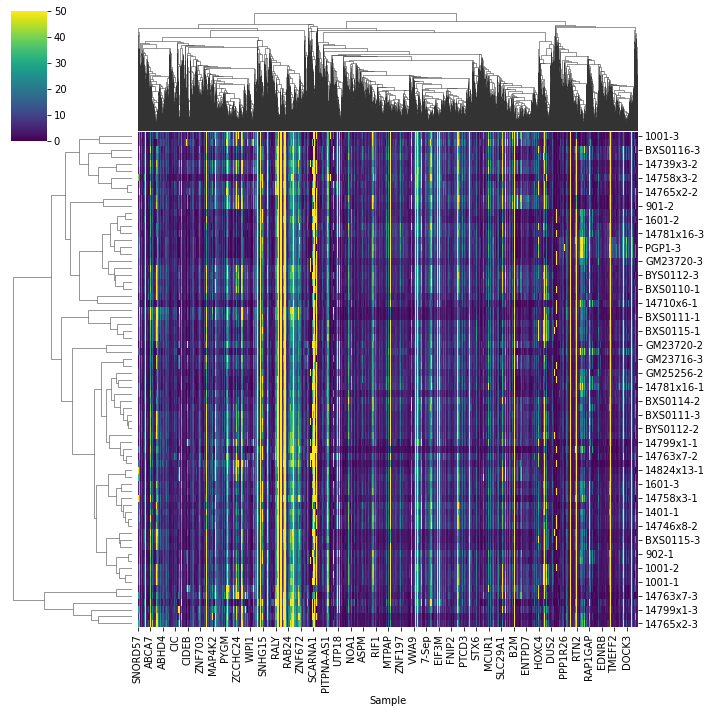

In [4]:
#cluster map of raw data
sns.clustermap(rna,cmap='viridis',metric='correlation',annot_kws={'fontsize':11},fmt='',
               vmax=50,vmin=0
               ,linewidth=0.0005,linecolor='#222')

In [5]:
#create target column
autism = []
for i in range(71):
    if i > 47:
        autism.append(2.0)
    elif i > 35:
        autism.append(1.0)
    else: 
        autism.append(0.0)
autism = np.asarray(autism)
autism

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.])

Text(0, 0.5, 'Second Principal Component')

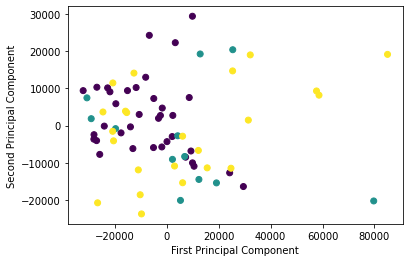

In [6]:
#PCA for raw data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
rna_pca = pca.fit_transform(rna)

plt.scatter(rna_pca[:,0],rna_pca[:,1],c=autism)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [7]:
#Pearson Correlation Analysis

rna.insert(loc=0, column='Autism', value=autism)
corr_mat = rna.corr()
corr_mat

Sample,Autism,CDK5RAP1,TMEM246,PKD1,EDEM1,LSM11,COL26A1,CPSF6,DCTN5,MRPS33,...,UBE2T,PTK7,EIF2B3,CDK16,C15orf61,GSTP1,IPP,ASB3,EHD4,NRSN2
Sample,,,,,,,,,,,,,,,,,,,,,
Autism,1.000000,0.366795,-0.366983,0.179389,0.269787,-0.257641,0.272226,-0.178521,-0.077099,0.293796,...,0.194778,0.091695,0.180158,0.065858,0.135033,0.333273,0.056732,-0.351366,0.122422,0.124916
CDK5RAP1,0.366795,1.000000,-0.221270,-0.061825,0.383307,-0.052498,-0.048943,0.264142,0.298359,0.141636,...,0.314784,-0.006530,0.221719,-0.021016,-0.059299,0.048983,0.254844,-0.026208,0.174721,-0.170981
TMEM246,-0.366983,-0.221270,1.000000,0.232693,-0.445011,0.801646,0.152933,0.488251,0.370320,-0.496965,...,-0.025975,-0.596624,0.327144,0.337785,0.093838,-0.590858,-0.174283,0.254849,-0.524046,0.105362
PKD1,0.179389,-0.061825,0.232693,1.000000,-0.175494,0.142906,0.416551,0.017136,0.045304,-0.316792,...,0.126380,-0.187155,-0.046082,0.362955,0.323684,-0.068946,-0.230009,-0.201963,-0.198612,0.334692
EDEM1,0.269787,0.383307,-0.445011,-0.175494,1.000000,-0.101804,-0.304569,0.082918,0.462386,0.543904,...,-0.196570,0.577473,-0.006869,-0.326407,0.047936,0.267823,0.693256,0.200890,0.392428,-0.049340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSTP1,0.333273,0.048983,-0.590858,-0.068946,0.267823,-0.626504,0.395069,-0.694863,-0.449263,0.453588,...,-0.118260,0.575811,-0.333238,0.162761,0.345982,1.000000,0.024864,-0.271579,0.683010,0.440418
IPP,0.056732,0.254844,-0.174283,-0.230009,0.693256,0.102361,-0.331744,0.359162,0.585240,0.525206,...,-0.037590,0.260989,0.325623,-0.210132,0.019334,0.024864,1.000000,0.546535,0.127819,-0.260536
ASB3,-0.351366,-0.026208,0.254849,-0.201963,0.200890,0.290793,-0.400720,0.565802,0.526667,0.252136,...,0.022661,-0.049684,0.383615,-0.185861,-0.028097,-0.271579,0.546535,1.000000,-0.077960,-0.242676


In [9]:
pos_corr = corr_mat[corr_mat['Autism'] >= 0.5]

neg_corr = corr_mat[corr_mat['Autism'] <= -0.5]

print('Positive Correlation')
display(pos_corr)

print('Negative Correlation')
display(neg_corr)

Positive Correlation


Sample,Autism,CDK5RAP1,TMEM246,PKD1,EDEM1,LSM11,COL26A1,CPSF6,DCTN5,MRPS33,...,UBE2T,PTK7,EIF2B3,CDK16,C15orf61,GSTP1,IPP,ASB3,EHD4,NRSN2
Sample,,,,,,,,,,,,,,,,,,,,,
Autism,1.000000,0.366795,-0.366983,0.179389,0.269787,-0.257641,0.272226,-0.178521,-0.077099,0.293796,...,0.194778,0.091695,0.180158,0.065858,0.135033,0.333273,0.056732,-0.351366,0.122422,0.124916
HAUS4,0.642708,0.385012,-0.494856,-0.047624,0.514922,-0.329215,0.184963,-0.155729,0.065556,0.581611,...,0.296749,0.345284,0.146783,-0.035592,0.102740,0.509846,0.284663,-0.157582,0.427844,-0.013860
RNF181,0.554849,0.215868,-0.418904,-0.013180,0.149279,-0.427865,0.307909,-0.372168,-0.263315,0.498883,...,0.365156,0.285037,0.132387,0.118940,0.223496,0.694786,-0.040325,-0.244660,0.520436,0.325115
KXD1,0.533331,0.267810,-0.393109,0.257572,0.110924,-0.404885,0.476574,-0.338388,-0.227249,0.356426,...,0.460791,0.148743,-0.051265,0.311736,0.295740,0.656665,-0.081634,-0.320789,0.451717,0.175184
C1orf86,0.598993,0.032796,-0.300883,0.400132,0.058748,-0.332168,0.507938,-0.477076,-0.334230,0.159042,...,0.121987,0.114697,-0.143037,0.351203,0.292200,0.558224,-0.168722,-0.413800,0.239412,0.479667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDTL,0.599669,0.173288,-0.207115,0.359240,0.024478,-0.235014,0.659641,-0.292205,-0.224681,0.235338,...,0.294694,0.003185,0.072649,0.506895,0.427234,0.576097,-0.125153,-0.370002,0.203429,0.311844
GLTSCR2,0.525011,0.204535,-0.370461,0.317406,0.093806,-0.383833,0.556372,-0.397910,-0.285194,0.232748,...,0.335554,0.160052,-0.202485,0.334138,0.295663,0.615770,-0.119102,-0.460539,0.398640,0.161010
CAPG,0.508112,0.234216,-0.636999,0.061376,0.630794,-0.403449,0.104762,-0.400096,-0.020875,0.518092,...,-0.126214,0.623491,-0.182054,-0.089328,0.303628,0.672361,0.261168,-0.194767,0.532677,0.202314


Negative Correlation


Sample,Autism,CDK5RAP1,TMEM246,PKD1,EDEM1,LSM11,COL26A1,CPSF6,DCTN5,MRPS33,...,UBE2T,PTK7,EIF2B3,CDK16,C15orf61,GSTP1,IPP,ASB3,EHD4,NRSN2
Sample,,,,,,,,,,,,,,,,,,,,,
WRB,-0.544043,-0.262121,0.416354,-0.229189,-0.439663,0.210506,-0.104255,0.061113,-0.117827,-0.224273,...,-0.185735,-0.208328,0.068437,0.059511,-0.003539,-0.189091,-0.172586,0.239915,-0.255788,0.077522
ZDHHC21,-0.531623,-0.067019,0.661941,-0.088789,-0.168356,0.671335,-0.331452,0.655213,0.419818,-0.387529,...,-0.125075,-0.346401,0.209711,-0.188637,-0.247529,-0.716215,0.030528,0.399697,-0.495833,-0.181321
FAM199X,-0.532837,-0.075801,0.564040,-0.093862,-0.019421,0.619648,-0.291380,0.583248,0.545206,-0.187657,...,-0.086327,-0.320748,0.300948,0.153951,-0.000769,-0.459300,0.264253,0.515053,-0.361529,-0.188484
ABHD3,-0.507356,0.018944,0.109075,-0.294258,0.095757,0.166371,-0.405289,0.372466,0.273649,0.027753,...,-0.096663,-0.048867,0.060356,-0.071100,-0.162450,-0.257448,0.295924,0.488242,-0.180342,-0.340928
HNRNPH3,-0.518113,-0.064962,0.217935,-0.085224,0.136792,0.314852,-0.458970,0.568075,0.557332,0.054507,...,0.169735,-0.103696,0.240954,-0.087071,-0.084614,-0.370822,0.469341,0.662469,-0.099903,-0.384648
TMPO,-0.599278,-0.245080,0.556219,-0.086063,-0.393341,0.432753,-0.194072,0.564932,0.233956,-0.341935,...,0.194267,-0.533342,0.184600,0.090949,-0.240590,-0.583175,0.000118,0.450564,-0.477020,-0.404774
CCDC126,-0.611790,-0.011995,0.437051,-0.218829,-0.106647,0.522031,-0.483374,0.494065,0.366965,-0.212543,...,-0.027028,-0.276748,0.147039,-0.170238,-0.194832,-0.584231,0.106906,0.383447,-0.340811,-0.322481
FAM57B,-0.553684,-0.226725,0.620125,0.231462,-0.522831,0.467466,0.118892,0.319492,0.100885,-0.646639,...,0.090668,-0.558024,0.026769,0.397346,-0.081003,-0.459307,-0.265849,0.018984,-0.454928,-0.059846
ZIC3,-0.555137,-0.203535,0.704994,-0.068407,-0.386409,0.510730,0.028243,0.327509,0.141964,-0.394012,...,-0.080093,-0.418662,0.122435,0.314593,-0.098850,-0.347258,-0.088642,0.310982,-0.408284,-0.033490


In [10]:
#get correlated genes

pos_corr_genes = [i for i in pos_corr.index]
neg_corr_genes = [i for i in neg_corr.index]

corr_genes = [i for j in (pos_corr_genes,neg_corr_genes) for i in j]


In [11]:
rna_corr = rna[corr_genes]
rna_corr.head()

Sample,Autism,HAUS4,RNF181,KXD1,C1orf86,IRAK1,VIM-AS1,PDIA5,ACOT2,PDLIM2,...,KLHL42,C16orf52,PCDHGB6,UBE2D1,RFX3,TMEM41B,RNF138,ILDR2,ZC2HC1A,STAU2
PGP1-1,0.0,12.629804,76.525449,30.429274,7.280333,10.555950,125.905261,8.136986,1.948624,2.679615,...,6.978103,3.578051,11.786147,8.772098,4.390357,11.675236,8.758149,4.535768,7.779318,7.562800
PGP1-2,0.0,7.479163,64.371712,25.723551,8.316094,9.193199,105.934341,8.197034,2.535708,2.340497,...,5.732223,2.880756,8.945203,5.686884,9.283210,7.221791,6.999756,5.966492,5.213709,4.653565
PGP1-3,0.0,4.118585,35.200909,19.739899,6.307552,1.128194,104.386052,2.946072,1.319370,1.068997,...,10.292776,6.064095,27.506405,12.761038,5.833062,7.859384,5.692169,6.851906,12.679813,7.161440
GM23716-1,0.0,3.836036,34.668537,19.047699,4.057933,1.172776,87.691828,2.940691,1.239815,0.532084,...,10.138596,5.483229,27.734439,12.329933,5.918293,8.301403,5.240994,6.654243,13.100313,7.339162
GM23716-2,0.0,4.588342,31.756722,19.372522,6.031917,0.621480,121.517858,2.507901,1.562625,0.931017,...,9.259207,4.834569,30.732222,12.876661,5.018022,7.464295,2.856071,7.252019,12.767415,8.087068


In [13]:
rna_corr.to_csv(r'fpkm_corr.csv')